In [2]:
import cv2
import os

In [3]:
from PIL import Image

# File Name Cutting & Size Unification

fileList = os.listdir('./realData/')
count = 1
for file in fileList:
    fileNumber = file.split('-')[1]
    img = Image.open('./realData/' + file)
    img_resize = img.resize((256, 256))
    if(file.split('-')[2] == '001.jpg') or (file.split('-')[2] == '01.jpg'):
        count = 1
    img_resize.save('./ImageSizeUnificated256/resized.' + fileNumber + '(' + str(count) + ').png')
    count += 1

# -------------------------------------------------------------------------------------------------------

# Image Gray Scaler

fileList = os.listdir('./ImageSizeUnificated256/')

for file in fileList:
    fileNumber = file.split('.')[1]
    imageName = './ImageSizeUnificated256/resized.' + fileNumber + '.png'
    image = cv2.imread(imageName, cv2.IMREAD_COLOR)
    if image is None:
        print('Could not open or find the Image')
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("./grayImages256/" + fileNumber + '.png', grayImage)

# -------------------------------------------------------------------------------------------------------

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [6]:
filenames = os.listdir("./grayImages/")
categories = []
for filename in filenames:
    category = filename.split('.')[0][:4]
    categories.append(category)
    
df = pd.DataFrame({
    'filename' : filenames,
    'category' : categories
})

# -------------------------------------------------------------------------------------------

In [7]:
df.sort_values(by='category', ascending=True)

,filename,category
0,3001(1).png,3001
1,3001(2).png,3001
2,3001(3).png,3001
3,3001(4).png,3001
4,3001(5).png,3001
...,...,...
2111,6022(2).png,6022
2110,6022(10).png,6022
2109,6022(1).png,6022
2112,6022(3).png,6022


df.to_csv('./label.csv')

# -------------------------------------------------------------------------------------------------------

# Label Count

In [8]:
len(df['category'].unique())

258

# -------------------------------------------------------------------------------------------------------

3062(18).png


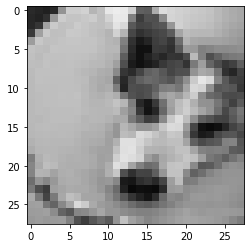

In [9]:
sample = random.choice(filenames)
print(sample)
image = load_img("./grayImages/"+sample)
plt.imshow(image)

# -------------------------------------------------------------------------------------------------------

# Data Labeling
## -------------------------------------------------------
## train target data / size : 28x28

In [10]:
train_target = np.array(df['category'])

In [11]:
train_target

array(['3001', '3001', '3001', ..., '6022', '6022', '6022'], dtype=object)

In [12]:
train_target = train_target.astype('uint8')

In [13]:
train_target

array([185, 185, 185, ..., 134, 134, 134], dtype=uint8)

In [14]:
print('dtype : ' ,train_target.dtype)
print('type : ', type(train_target))
print('shape : ', train_target.shape)
print('unique : ', np.unique(train_target, return_counts=True))

dtype :  uint8
type :  <class 'numpy.ndarray'>
shape :  (2119,)
unique :  (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 134, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255], dtype=uint8), array([ 9, 35, 10, 24,  6, 15,  4, 17, 18, 15,  3, 13,  

# -------------------------------------------------------------------------------------------------------

# 1개 짜리 데이터 삭제
## 삭제 대상

deleteTarget = []

targetNumber = (np.unique(train_target, return_counts=True))[0]
countes = (np.unique(train_target, return_counts=True))[1]

for i in range(0, len(countes)):
    if countes[i] == 1:
        deleteTarget.append(targetNumber[i])

print(deleteTarget)

## 삭제

for i in range(0, len(countes)):
    if countes[i] == 1:
        if os.path.isfile('./grayImages/' + targetNumber[i] + '(1).png'):
            os.remove('./grayImages/' + targetNumber[i] + '(1).png')

fileList = os.listdir('./grayImages/')
totalFileCount = 0
for file in fileList:
    totalFileCount += 1
    
print(totalFileCount)

# -------------------------------------------------------------------------------------------------------

# train input data

In [15]:
train_input = []

In [16]:
filenames = os.listdir("./grayImages/")
for filename in filenames:
    train_input.append( np.array(Image.open('./grayImages/' + filename)) )

In [17]:
train_input = np.array(train_input)

In [18]:
train_input

array([[[ 63,  68,  70, ...,  93,  95, 102],
        [ 69,  70,  75, ...,  83,  86, 101],
        [ 70,  72,  73, ...,  81,  77,  84],
        ...,
        [ 95,  92,  81, ..., 122,  85,  80],
        [122, 117, 114, ..., 111,  81,  85],
        [189, 187, 186, ..., 100,  81,  86]],

       [[ 63,  68,  70, ...,  93,  95, 102],
        [ 69,  70,  75, ...,  83,  86, 101],
        [ 70,  72,  73, ...,  81,  77,  84],
        ...,
        [ 95,  92,  81, ..., 122,  85,  80],
        [122, 117, 114, ..., 111,  81,  85],
        [189, 187, 186, ..., 100,  81,  86]],

       [[ 49,  54,  58, ...,  89,  75,  72],
        [ 48,  52,  61, ...,  99,  93,  85],
        [ 54,  55,  62, ...,  88,  88,  89],
        ...,
        [174, 182, 186, ..., 145, 146, 147],
        [133, 145, 157, ..., 138, 139, 137],
        [ 93,  92,  88, ..., 124, 129, 126]],

       ...,

       [[ 44,  38,  43, ...,  96,  89, 106],
        [ 88,  79,  79, ..., 121,  99, 118],
        [ 95,  97,  99, ..., 141, 110, 126

In [19]:
print(train_input.shape)

(2119, 28, 28)


# -------------------------------------------------------------------------------------------------------

# Data Normalization 

In [20]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

In [21]:
print(train_scaled.shape)

(2119, 28, 28, 1)


# Data Split

In [22]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [23]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(1695, 28, 28, 1) (1695,)
(424, 28, 28, 1) (424,)


# CNN

In [73]:
from tensorflow import keras

In [74]:
model_CNN = keras.Sequential()

model.evaluate(val_scaled, val_target)

# ************ breakpoint ************

# Feature Extraction

In [75]:
model_CNN.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model_CNN.add(keras.layers.MaxPooling2D(2))
model_CNN.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model_CNN.add(keras.layers.MaxPooling2D(2))

# Classifier

In [76]:
model_CNN.add(keras.layers.Flatten())
model_CNN.add(keras.layers.Dense(100, activation='relu'))
model_CNN.add(keras.layers.Dropout(0.4))
model_CNN.add(keras.layers.Dense(258, activation='softmax'))

# ************ breakpoint ************

# -------------------------------------------------------------------------------------------------------

# Data Split

In [77]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [78]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(1084, 28, 28, 1) (1084,)
(272, 28, 28, 1) (272,)


In [79]:
model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

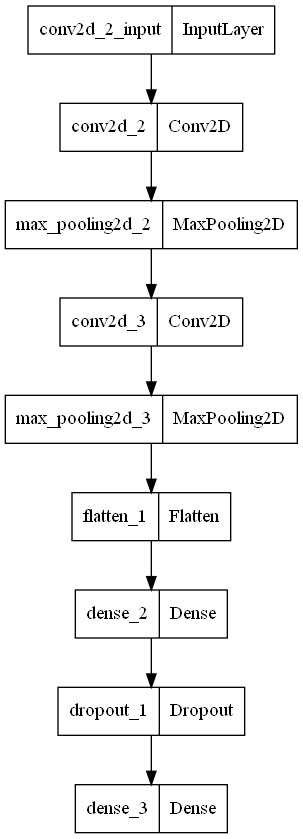

In [80]:
keras.utils.plot_model(model_CNN)

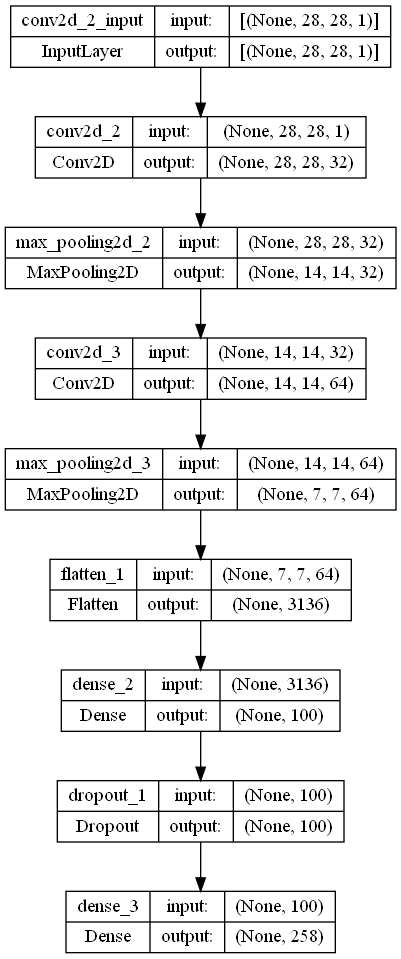

In [81]:
keras.utils.plot_model(model_CNN, show_shapes=True)

In [82]:
model_CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model_CNN.fit(train_scaled, train_target, epochs=30, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
34/34 [==============================] - 1s 24ms/step - loss: 5.4857 - accuracy: 0.0074 - val_loss: 5.3339 - val_accuracy: 0.0000e+00
Epoch 2/30
34/34 [==============================] - 1s 17ms/step - loss: 5.2242 - accuracy: 0.0129 - val_loss: 5.1180 - val_accuracy: 0.0000e+00
Epoch 3/30
34/34 [==============================] - 1s 19ms/step - loss: 5.0806 - accuracy: 0.0157 - val_loss: 5.0256 - val_accuracy: 0.0074
Epoch 4/30
34/34 [==============================] - 1s 17ms/step - loss: 5.0008 - accuracy: 0.0203 - val_loss: 4.9775 - val_accuracy: 0.0257
Epoch 5/30
34/34 [==============================] - 1s 19ms/step - loss: 4.9057 - accuracy: 0.0277 - val_loss: 4.8712 - val_accuracy: 0.0368
Epoch 6/30
34/34 [==============================] - 1s 17ms/step - loss: 4.7154 - accuracy: 0.0498 - val_loss: 4.7662 - val_accuracy: 0.0772
Epoch 7/30
34/34 [==============================] - 1s 17ms/step - loss: 4.5184 - accuracy: 0.0839 - val_loss: 4.5875 - val_accuracy: 0.0882
Epoch

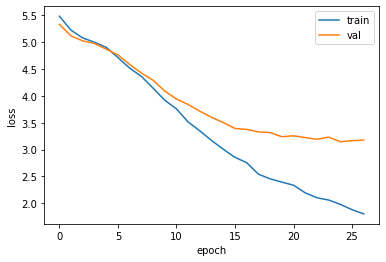

In [87]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [88]:
model_CNN2 = keras.models.load_model('./best-cnn-model.h5')
model_CNN2.evaluate(val_scaled, val_target)

9/9 [==============================] - 0s 5ms/step - loss: 3.1778 - accuracy: 0.4154


[3.1778404712677, 0.4154411852359772]

# Test
## y_train first data ↓↓↓

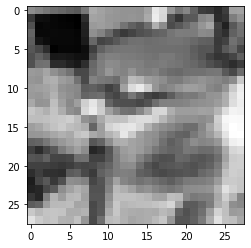

In [89]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

# Performance

# 위 사진에 대한 258개 확률 출력

In [90]:
preds = model_CNN.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 14ms/step
[[4.64540608e-02 1.15427945e-04 6.33789314e-05 3.80390411e-04
  1.67412873e-06 3.00888461e-03 3.38131867e-05 4.03962657e-02
  1.66890404e-05 3.70733906e-05 6.53819052e-06 3.32059513e-04
  1.25618023e-08 2.63323656e-08 2.91792657e-09 2.80212902e-07
  7.65753398e-08 1.42597694e-08 1.60997065e-08 1.25315480e-09
  7.24138705e-09 3.83013976e-09 4.15224993e-10 2.94670368e-08
  1.52931303e-08 1.25608379e-09 3.61440954e-07 1.47807067e-09
  3.37485595e-09 8.18761450e-08 6.44084386e-09 2.12824016e-08
  3.17314388e-08 1.07228546e-08 3.86386839e-10 7.79168658e-08
  4.59077976e-09 3.75736064e-08 1.88892155e-08 2.64084548e-07
  1.49028931e-08 4.29515516e-08 1.96456362e-09 6.88492207e-07
  3.11791723e-07 3.71233995e-08 5.21154853e-09 5.30428146e-09
  3.42899620e-09 5.34840006e-10 3.76209552e-09 6.38629727e-09
  3.39295170e-08 2.59972044e-08 9.96210225e-09 6.28083852e-09
  4.94730621e-08 1.24853656e-08 1.68159231e-09 6.01216428e-08
  2.06639669e-07 1

# 확률 그래프

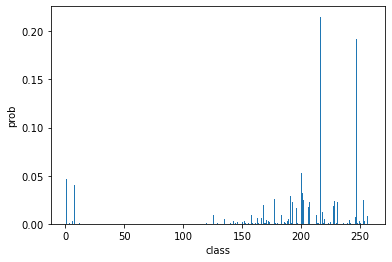

In [91]:
plt.bar(range(1, 259), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

# Total target (classes) < append

In [92]:
classes = []
for i in df['category'].unique():
    classes.append(i)

In [93]:
classes

['3001',
 '3002',
 '3003',
 '3004',
 '3005',
 '3006',
 '3008',
 '3009',
 '3010',
 '3011',
 '3012',
 '3013',
 '3014',
 '3015',
 '3016',
 '3017',
 '3018',
 '3019',
 '3020',
 '3021',
 '3022',
 '3023',
 '3024',
 '3025',
 '3027',
 '3028',
 '3029',
 '3030',
 '3031',
 '3032',
 '3033',
 '3034',
 '3035',
 '3036',
 '3037',
 '3038',
 '3039',
 '3040',
 '3041',
 '3042',
 '3043',
 '3044',
 '3045',
 '3046',
 '3047',
 '3048',
 '3049',
 '3050',
 '3051',
 '3052',
 '3053',
 '3054',
 '3055',
 '3056',
 '3057',
 '3058',
 '3059',
 '3060',
 '3061',
 '3062',
 '3063',
 '3064',
 '3065',
 '3066',
 '3067',
 '3068',
 '3069',
 '3070',
 '3071',
 '3072',
 '3073',
 '3074',
 '3075',
 '3076',
 '3077',
 '3078',
 '3079',
 '3080',
 '3081',
 '3082',
 '3083',
 '4000',
 '4001',
 '4002',
 '4004',
 '4005',
 '4006',
 '4007',
 '4008',
 '4009',
 '4010',
 '4011',
 '4012',
 '4013',
 '4014',
 '4015',
 '4016',
 '4017',
 '4018',
 '4019',
 '4020',
 '4021',
 '4022',
 '4024',
 '4025',
 '4026',
 '4027',
 '4028',
 '4029',
 '4030',
 '4031',
 

# 위 사진의 target

In [94]:
import numpy as np
print(classes[np.argmax(preds)])

5053


In [95]:
acc = model_CNN2.evaluate(val_scaled, val_target)

9/9 [==============================] - 0s 5ms/step - loss: 3.1778 - accuracy: 0.4154


In [96]:
print("Accuracy : {:.2f}%".format(acc[1]*100))

Accuracy : 41.54%
